In [4]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib 

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# This forces plots to be shown inline in the notebook
%matplotlib inline

In [5]:
#  --- Lets make some example data. ---
x_example_data = np.linspace(0,5,10)
y_example_data = x_example_data**2

Text(3, 5, 'This is a text object relative to the inner axes')

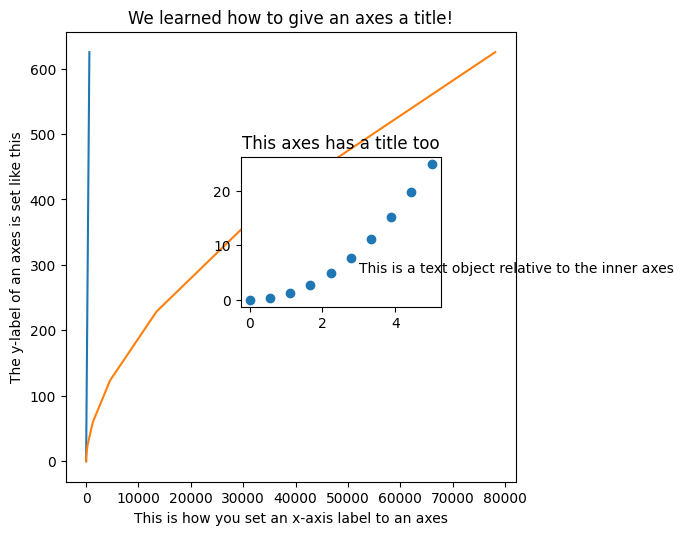

In [6]:
### Create a figure ###
example_figure = plt.figure(figsize =(5,5)) #you give the size of the figure as a tuple of inches

### Create an axes separately and add it to the figure ###
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) #the argument gives the relative location of the axes in percentage from the corners of the figure. The order is left, bottom, right, top. 

### Set labels and titles to the axes ###
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")
example_axes_inner = example_figure.add_axes([0.45, 0.45, 0.4, 0.3])
example_axes_inner.set_title("This axes has a title too")

### Add something to the axes ###
example_axes_inner.scatter(x_example_data, y_example_data)

# Multiple things, like lines can be plotted on same axis. 
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 5, "This is a text object relative to the inner axes")

#Many more things can be added to axes in a similar way, not just text. 
#For more information there are many good tutorials available for example in youtube. 

In [7]:
# ----- Create some random data for the example, 3 continuous numeric features and 3 binary -----
#dont worry about understanding the function, it creates lists and is shorthand for a for loop called list comprehension.
numeric_datas = [np.random.rand(10,2) for _ in range(0,3)] #this creates list of lists of linear data, using list comprehension
binary_datas = [(np.unique(np.random.randint(0, 2, size= 10), return_counts = True)[1]) for _ in range(0,3)] # create list of lists of samples of 0,1 like (co

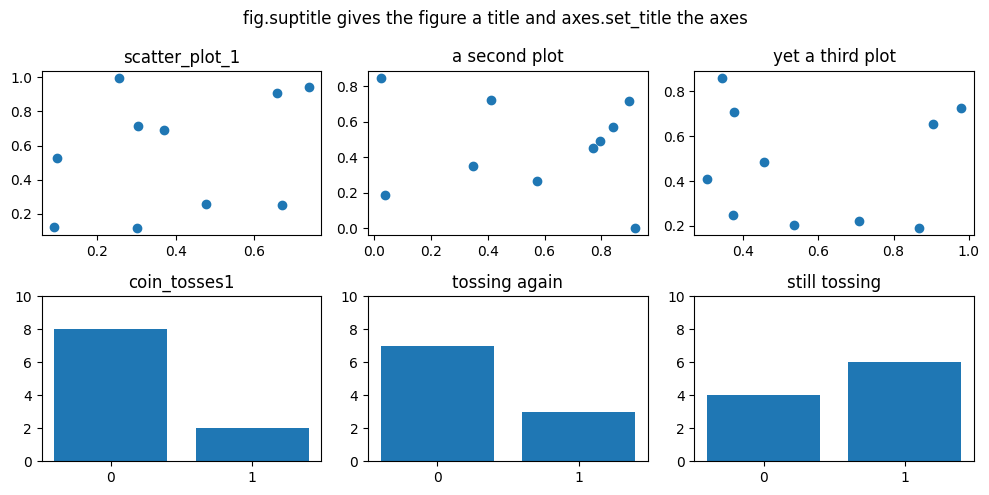

In [8]:
# Create figure with six axes in a 2*3 grid and set up titles --------------------------------------------------------
fig, axes = plt.subplots(2,3, figsize = (10,5)) # now axes have indexes like axes[i, j]
numeric_plot_titles = ['scatter_plot_1', 'a second plot', 'yet a third plot' ]#some titles for the different axes
binary_plot_titles = ['coin_tosses1', 'tossing again', 'still tossing' ]#some titles for the different axes


# Enumerate the index into the axes, fill the first 3 columns of first row with scatterplots of numeric_datas --------
i = 0 # for indexing to the row of the axes [**i**, j]
for j, numeric_data in enumerate(numeric_datas): # j = [0,1, ... n_datasets] for filling the columns, i stays constant as its the row
    axes[i, j].scatter(x = numeric_data[:, 0], y = numeric_data[:, 1]) #plots are called on the axes
    axes[i, j].set_title(numeric_plot_titles[j]) #set a title for each axes
plt.tight_layout()


# Plot the binary data -----------------------------------------------------------------------------------------------
i = 1 # second row
for j, binary_data in enumerate(binary_datas): # j = [0,1, ... n_datasets] for filling the columns, i stays constant as its the row
    axes[i, j].bar(x = ["0","1"], height = binary_data) #make a barplot
    axes[i, j].set_title(binary_plot_titles[j]) #set a title for each axes
    axes[i, j].set_ylim((0,10)) # set the yaxis limits, set_xlim works the same way.  

fig.suptitle("fig.suptitle gives the figure a title and axes.set_title the axes")
plt.tight_layout()

<AxesSubplot:ylabel='Count'>

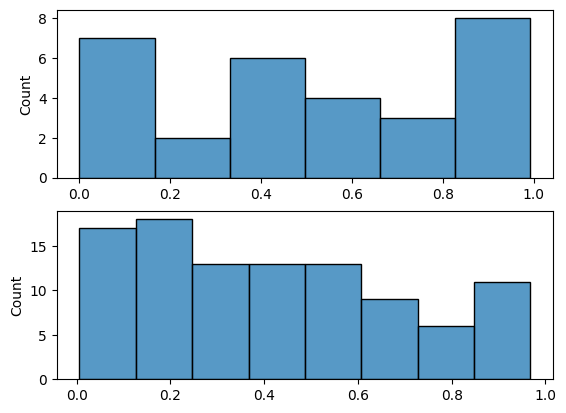

In [9]:
fig, axes = plt.subplots(2)

# make some data 
random_data_a = np.random.rand(30)
random_data_b = np.random.rand(100)

# print the data we are plotting
sns.histplot(data = random_data_a, ax = axes[0]) # we make a seaborn plot and put it into one of the axes we created
sns.histplot(data =  random_data_b, ax = axes[1]) # we make a seaborn plot and put it into one of the axes we created

In [10]:
a = ['a','b','c']
for item in a:
    print(item)

a
b
c


In [11]:
for index, item in enumerate(a):
    print(index,item)

0 a
1 b
2 c


In [12]:
# --- READ IN DATA (no need to change) --------
data_path = "cardiovascular_disease_data_ex_1.csv" #if you just give the name of the file it will look for the data in the same folder as your script
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'weight':'int', 'ap_lo':'int', 'ap_hi':'int', 'sex': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'cholesterol':'category'}) #the main data you use in this exercise should have this variable name, so that code given for you further on will run. 

In [15]:
data['sex'].value_counts(normalize=True)

False    0.614286
True     0.385714
Name: sex, dtype: Float64